In [1]:
import numpy as np
import matplotlib.pyplot as plt

# シグモイド関数

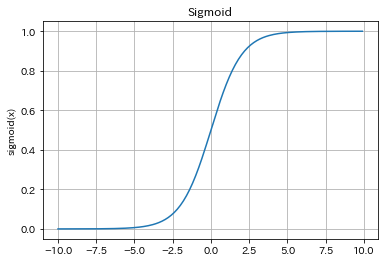

In [2]:
def sigmoid(x) :
    return 1.0 / (1.0 + np.exp(-1.0 * x))

x = np.arange(-10,10,0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylabel("sigmoid(x)")
plt.title("Sigmoid")
plt.grid(True)
plt.show()

# ReLu関数

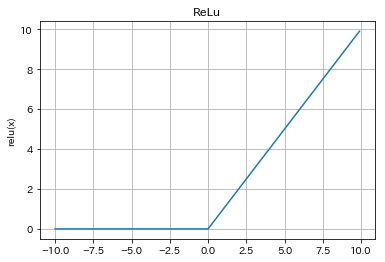

In [3]:
def relu(x) :
    return np.maximum(0, x)

x = np.arange(-10,10,0.1)
y = relu(x)

plt.plot(x, y)
plt.ylabel("relu(x)")
plt.title("ReLu")
plt.grid(True)
plt.show()

# 順伝搬ネットワークを作る
* 順伝搬の概要
```
[入力 x] → [伝搬] → [出力（確率) ]
```
* 入力
$$
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
$$
* 伝搬
$$
\begin{bmatrix}
u_{1} \\
u_{2}
\end{bmatrix}
=
\begin{bmatrix}
w_{11} & w_{12} \\
w_{21} & w_{22}
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
+
\begin{bmatrix}
b_{1} \\
b_{2}
\end{bmatrix}
$$
* 出力 (確率)
$$
\begin{bmatrix}
y_{1} \\
y_{2}
\end{bmatrix}
=
\begin{bmatrix}
f(u_{1}) \\
f(u_{2})
\end{bmatrix}
)
$$
f : relu など

In [4]:
def create_layer(in_size, out_size) :
    w = np.random.rand(out_size, in_size)
    b = np.random.rand(out_size,1)
    return w,b

def create_network(*units) :
    w_lst = []
    b_lst = []
    for layer in range(0, len(units) - 1) :
        in_size = units[layer]
        out_size = units[layer+1]
        w,b = create_layer(in_size, out_size)
        print("layer[{}] ({} -> {})\nW=\n{} \nb=\n{}".format(layer, in_size, out_size, w, b))
        w_lst.append(w)
        b_lst.append(b)
    return w_lst, b_lst
    
w,b = create_network(2,5,1)

layer[0] (2 -> 5)
W=
[[0.95771941 0.18986048]
 [0.32983606 0.35645814]
 [0.1063038  0.63591694]
 [0.7933482  0.51509166]
 [0.08207668 0.19505767]] 
b=
[[0.47837713]
 [0.58749318]
 [0.34299986]
 [0.0748261 ]
 [0.59574966]]
layer[1] (5 -> 1)
W=
[[0.7672056  0.60245074 0.5756283  0.79331635 0.05396692]] 
b=
[[0.25944252]]


# 順伝搬

In [8]:
def forward(x,w,b) :
    z = x
    for layer in range(0, len(w)) :
        print(z.T)
        u = w[layer].dot(z) + b[layer]
        z = relu(u)
    print(z.T)
    y = sigmoid(u)
    return y

x = np.array([
    [1.0],
    [2.0]])

y = forward(x,w,b)

print("y=\n{}".format(y))

[[1. 2.]]
[[1.81581751 1.63024553 1.72113753 1.89835762 1.06794168]]
[[5.18905765]]
y=
[[0.99445367]]


# 逆伝搬
* 順伝搬で何かの起きる予測確率は 0.73。しかし教師データ上は何かが起きているので y1 が 1.00　に近づくように w と b　を調整したい
* どうすれば y0 が選ばれるようになるか？ → y が
$$
t = 
\begin{bmatrix}
1.0 \\
0.0
\end{bmatrix}
$$
を出力するような w と b だったらよかった
* 正解値と出力値の誤差関数を定義して、その値が小さくなるように w,b を調整していく
$$
E(w,b) =  \frac{1}{2}  \sum_k (y_k - t_k)^2
$$
$$
E(w,b) \rightarrow min
$$
* 勾配降下法
$$
w = w -  \frac{\partial E}{\partial w} 
$$
    * w を増やしたら E が増えた → E を減らしたいので w を減らそう
    * w を増やしたら E が減った → E を減らしたいので w を増やそう
    * 偏微分の連鎖律より
$$
w = w -  \frac{\partial E}{\partial w} = w -  \frac{\partial E}{\partial y} \frac{\partial y}{\partial u} \frac{\partial u}{\partial w} 
$$
$$
\frac{\partial E}{\partial y} = \sum_k (y_k - t_k)
$$
$$
\frac{\partial y}{\partial u} = \frac{\partial \sigma (u)}{\partial u} = (1 - \sigma (u)) \sigma (u)
$$

In [6]:
t = np.array([
    [1.0],
    [0.0]])

def mean_squared_error(y,t) :
    return 0.5 * np.sum((y - t) ** 2)

e = mean_squared_error(y,t)
print(e)

0.49448443495299144
